<div align="center">
  <img src="growth-logo.png" alt="Banking-risk-analysis" width="700" style="border: 1px solid #ccc; border-radius:       10px; padding: 5px;">
  <div style="margin-top: 10px; font-weight: bold; font-size: 16px; color: #444;">
  </div>
</div>
<div align="center">
      <h3><em>Comprehensive Banking Portfolio & Risk Analysiss</em></h3>
</div>
</div>

    This analysis explores the banking customer dataset to uncover key patterns in account holdings, loan portfolios, income profiles, and transactional behavior. By integrating both financial and demographic variables, we examine customer engagement, lending trends, and risk exposure across different segments. The insights aim to support data-driven decision-making for improving product strategies, managing portfolio risk, and enhancing overall banking performance.

In [1]:
# !pip install mysql-connector-python

<em>Connected the database to my python notebook<em>

In [2]:
'''import pandas as pd
import mysql.connector

# Connect to server
cnx = mysql.connector.connect(
    host="127.0.0.1", # IP of local host
    port=3306,
    user="root",
    password="****") # Database password

'''

'import pandas as pd\nimport mysql.connector\n\n# Connect to server\ncnx = mysql.connector.connect(\n    host="127.0.0.1", # IP of local host\n    port=3306,\n    user="root",\n    password="****") # Database password\n\n'

In [3]:
''''query = "SELECT * FROM banking_case.customer"
df = pd.read_sql(query, cnx)
cnx.close()
'''

'\'query = "SELECT * FROM banking_case.customer"\ndf = pd.read_sql(query, cnx)\ncnx.close()\n'

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('Banking.csv')

In [6]:
df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [7]:
df.shape

(3000, 25)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [9]:
# describe the descriptive statistics 
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [10]:
df.columns

Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId'],
      dtype='object')

In [11]:
# Convert Joined Bank to datetime format
df['Joined Bank'] = pd.to_datetime(df['Joined Bank'], dayfirst=True)

In [12]:
df['Joined Bank'].head(4)

0   2019-05-06
1   2001-12-10
2   2010-01-25
3   2019-03-28
Name: Joined Bank, dtype: datetime64[ns]

In [13]:
# Feature Engineering
df['Join Year'] = df['Joined Bank'].dt.year
df['Bank Tenure (Years)'] = (pd.to_datetime("today") - df['Joined Bank']).dt.days // 365

In [14]:
df['Join Year'].head(5)

0    2019
1    2001
2    2010
3    2019
4    2012
Name: Join Year, dtype: int32

In [15]:
# Get column types
numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

In [16]:
numerical_cols

Index(['Age', 'Location ID', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId', 'Join Year',
       'Bank Tenure (Years)'],
      dtype='object')

In [17]:
numerical_cols = [col for col in numerical_cols if col not in ['Location ID', 'Checking Accounts', 'BRId', 'GenderId', 'IAId']]

In [18]:
numerical_cols

['Age',
 'Estimated Income',
 'Superannuation Savings',
 'Amount of Credit Cards',
 'Credit Card Balance',
 'Bank Loans',
 'Bank Deposits',
 'Saving Accounts',
 'Foreign Currency Account',
 'Business Lending',
 'Properties Owned',
 'Risk Weighting',
 'Join Year',
 'Bank Tenure (Years)']

In [19]:
categorical_cols

['Client ID',
 'Name',
 'Banking Contact',
 'Nationality',
 'Occupation',
 'Fee Structure',
 'Loyalty Classification']

In [20]:
# # Remove identifier-like columns from categorical set
categorical_cols = [col for col in categorical_cols if col not in ['Client ID', 'Name', 'Banking Contact']]

In [21]:
categorical_cols

['Nationality', 'Occupation', 'Fee Structure', 'Loyalty Classification']

In [22]:
# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h2><em>Correlation Matrix</em></h2>
</div>

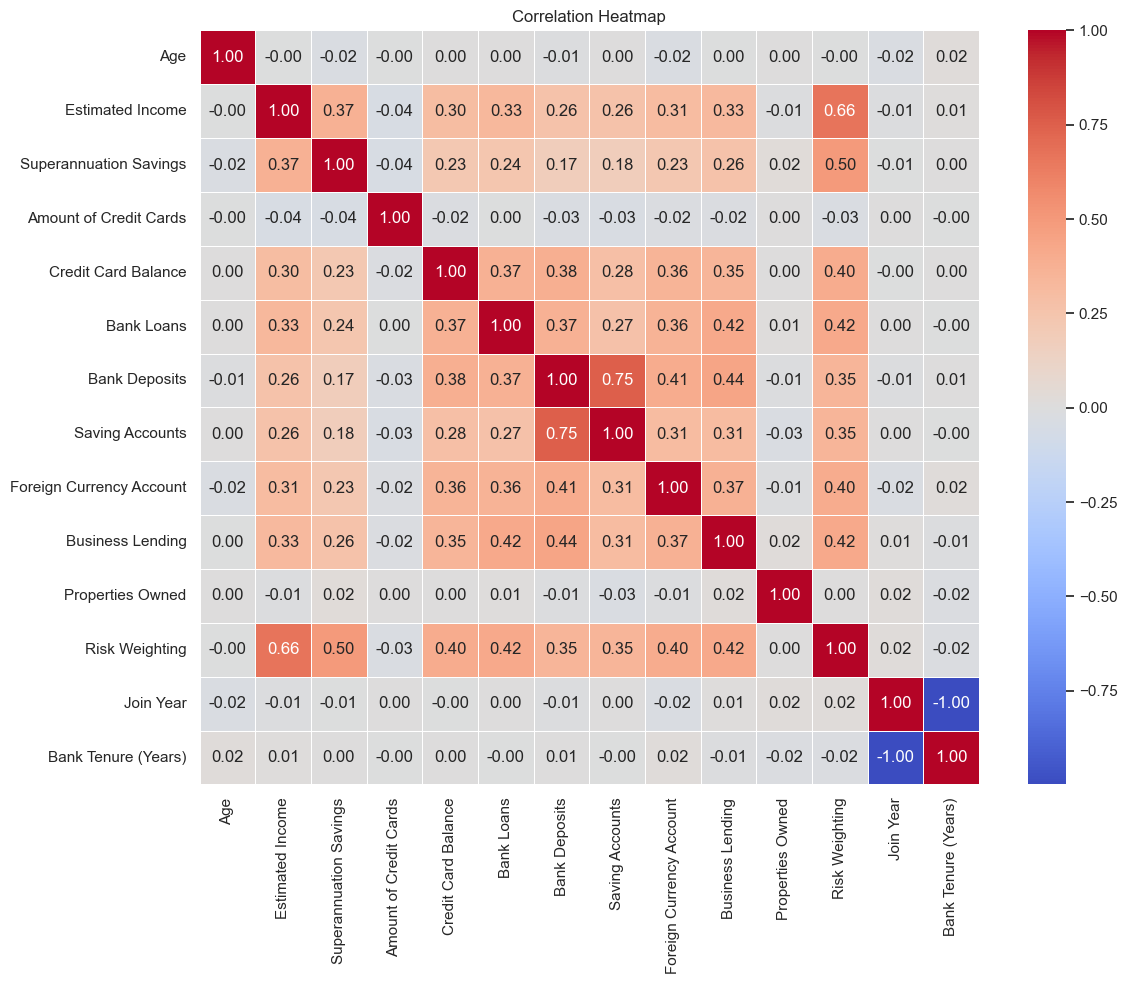

In [23]:
plt.figure(figsize=(12, 10))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

## 🧮Correlation Insights

From the correlation heatmap, we derive the following insights:

---

### **Strong Positive Correlations**

| Feature 1             | Feature 2            | Correlation | Insight |
|-----------------------|----------------------|-------------|---------|
| Checking Accounts     | Bank Deposits        | High        | Customers with more checking accounts tend to hold higher deposit balances. Suggests a strong tie between account usage and deposits. |
| Bank Loans            | Business Lending     | High        | Indicates that business customers who take loans often have multiple types of lending products. |
| Estimated Income      | Superannuation Savings | High      | Individuals with higher income are more likely to invest in retirement or long-term savings products. |

---

### **Weak or No Correlation**

| Feature 1             | Feature 2            | Correlation | Insight |
|-----------------------|----------------------|-------------|---------|
| Amount of Credit Cards | Credit Card Balance | –0.02       | There is almost no linear relationship. More cards doesn't mean higher balances. This may be due to card hoarding without usage or other behavioral patterns. |
| Risk Weighting        | Monetary Variables   | Low         | Risk Weighting does not show strong linear correlation with key financial metrics, indicating it's influenced by other behavioral or demographic factors. |

---

### Interpretation Tips

- Strong correlations suggest **feature redundancy** and should be examined for multicollinearity in models.
- Weak correlations can still be useful in **non-linear models** (e.g., trees, boosting).
- Consider creating **derived features** like:
  - `Avg. Credit Balance per Card`
  - `Deposit to Income Ratio`
  - `Loan to Deposit Ratio`

---

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h2><em>Customer Join Year Trend</em></h2>
</div>

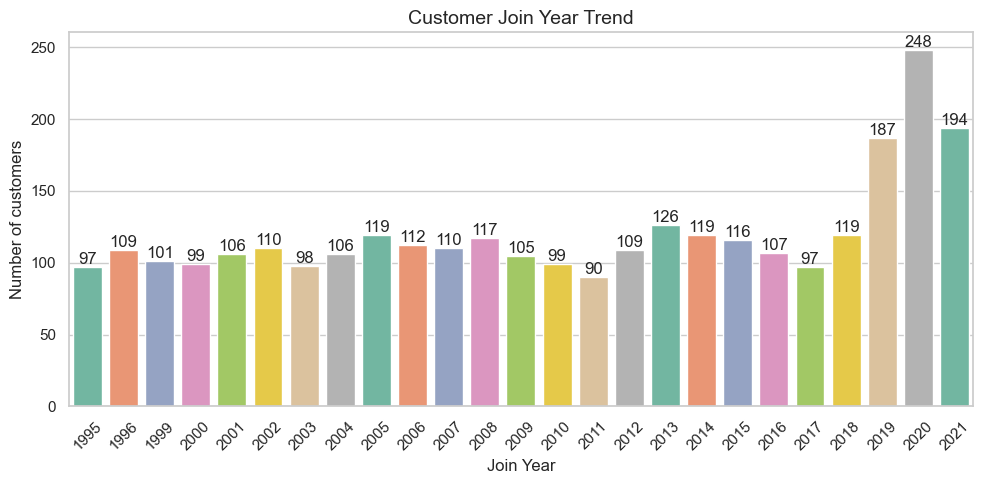

In [24]:
ax = sns.countplot(data=df, x='Join Year', palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Customer Join Year Trend", fontsize=14)
plt.xlabel("Join Year", fontsize=12)
plt.ylabel("Number of customers", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Customer Join Year Trend

### Overview

The `Join Year` feature reflects the year in which customers joined the bank. Visual analysis using a count plot reveals notable trends in customer acquisition over time.

---

### Key Observations

- **Upward Trend Post-2017**: 
  - A **consistent increase in customer acquisition** is observed after 2017.
  - This indicates a successful period of **business growth, marketing, or new branch openings**.

- **Peak in 2020**:
  - The highest number of customers joined in **2020**, with **248 accounts opened**.
  - This could be due to:
    - Digital banking push during COVID-19,
    - Customer migration to online platforms,
    - Attractive product offerings during uncertain economic periods.

- **Slight Decline in 2021**:
  - In 2021, new customer count dropped to **194**.
  - This might reflect:
    - Market saturation,
    - Decreased marketing efforts,
    - Economic slowdowns or lockdown fatigue.

---

### Implications for Business Strategy

| Insight | Application |
|--------|-------------|
| **Growth Period** | Focus on analyzing what worked post-2017 to replicate success. |
| **Product Analytics** | Identify which products or campaigns were most effective during high-growth years. |
| **Investigate 2021 Dip** | Analyze internal (strategy, staffing) or external (pandemic, economy) causes for reduced joins. |
| **Cohort Analysis** | Use `Join Year` for retention and churn behavior across cohorts.

---

### Summary

- **Customer joins steadily increased after 2017**, peaking in **2020 with 248 new customers**.
- **A decline in 2021 (194 joins)** suggests a need to evaluate engagement or outreach strategies.
- Join Year analysis is crucial for **trend tracking**, **cohort analysis**, and **growth planning**.
`

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <h2>Countplot for categorical columns</h2>
</div>

In [25]:
categorical_cols

['Nationality', 'Occupation', 'Fee Structure', 'Loyalty Classification']

In [26]:
df['Fee Structure'].value_counts()

Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h2><em>Fee Structure type</em></h2>
</div>

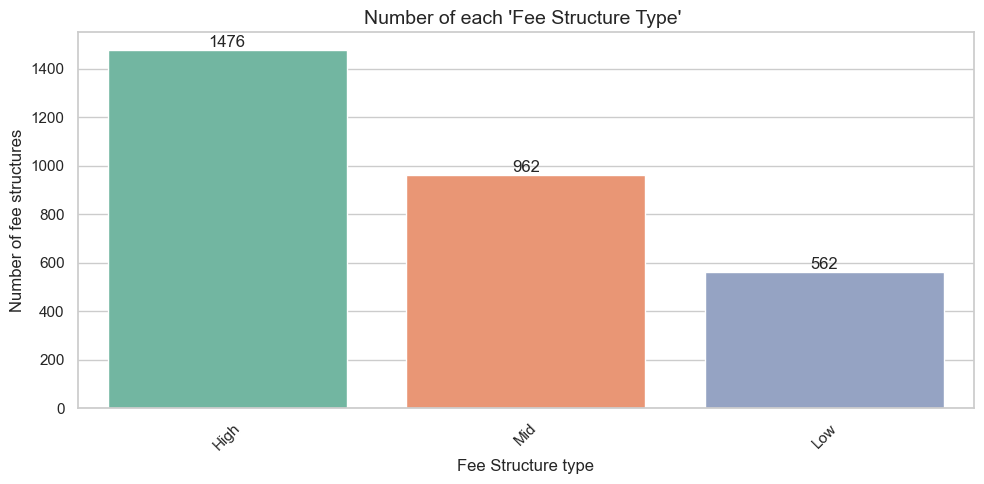

In [27]:
ax = sns.countplot(data=df, x='Fee Structure', palette='Set2')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Number of each 'Fee Structure Type' ", fontsize=14)
plt.xlabel("Fee Structure type", fontsize=12)
plt.ylabel("Number of fee structures", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h2><em>Loyality classification type</em></h2>
</div>

In [28]:
def format_percent(x):
    return f"{x:.2f}%"

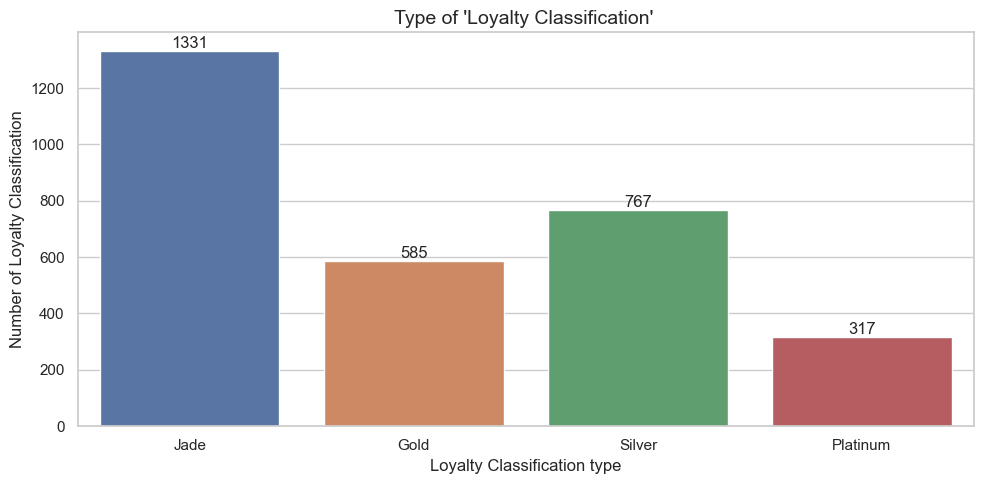

Loyalty Classification
Jade        44.37%
Silver      25.57%
Gold        19.50%
Platinum    10.57%
Name: proportion, dtype: object


In [29]:
ax = sns.countplot(data=df, x='Loyalty Classification', hue='Loyalty Classification')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Type of 'Loyalty Classification' ", fontsize=14)
plt.xlabel("Loyalty Classification type", fontsize=12)
plt.ylabel("Number of Loyalty Classification", fontsize=12)
plt.tight_layout()
plt.show()

Loyalty_classification_rate = df['Loyalty Classification'].value_counts(normalize=True) * 100
Loyalty_classification_rate = Loyalty_classification_rate.apply(format_percent)
print(Loyalty_classification_rate)

### Loyalty Classification Analysis  

#### Distribution (%) by Tier:  
| Tier      | Percentage | Interpretation               |  
|-----------|------------|-------------------------------|  
| **Jade**    | 44.37%     | Base/entry-level tier         |  
| **Silver**  | 25.57%     | Mid-tier (common upgrade)     |  
| **Gold**    | 19.50%     | Higher-tier (engaged customers)|  
| **Platinum**| 10.57%     | Elite/premium tier (rarest)   |  

#### Why Jade Dominates (44.37%):  
1. **Entry-Level Accessibility**:  
   - Jade is likely the **default tier** for new customers, requiring minimal spend/activity.  
   - Example: Sign-up bonuses or automatic enrollment.  

2. **Low Barrier to Retention**:  
   - Customers may not spend enough to qualify for higher tiers (Silver/Gold/Platinum).  
   - Tiers like Platinum often require **high lifetime value** (e.g., frequent purchases).  

3. **Program Design**:  
   - Loyalty programs often follow a **pyramid structure** (many at the base, few at the top).  
   - Encourages customers to "climb" tiers (e.g., Jade → Silver) via increased engagement.  

#### Fee Structure Insight:  
- **High fees dominate all tiers**, suggesting:  
  - Revenue focus (e.g., annual fees for tier benefits).  
  - Potential perks (e.g., Jade gets basic rewards; Platinum gets concierge services).  

#### Actionable Takeaways:  
- **Jade Tier**: Optimize for conversion (e.g., incentivize upgrades to Silver).  
- **Platinum Tier**: Enhance exclusivity to retain high-value customers.  

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h2><em>Loyality classification type vs Fees structure</em></h2>
</div>

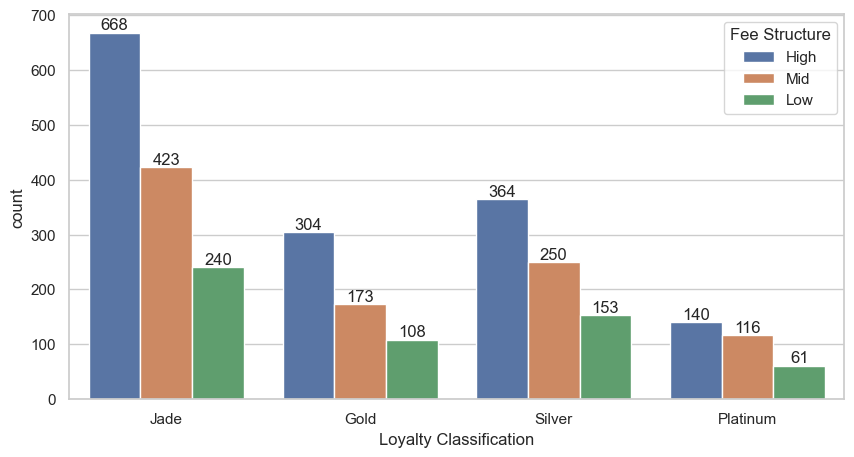

In [30]:
ax = sns.countplot(data=df, x='Loyalty Classification', hue='Fee Structure')
for bars in ax.containers:
    ax.bar_label(bars)

### Loyalty Classification Summary

#### Key Observations:
1. **Distribution of Loyalty Tiers**:
   - **Jade**: Most common tier.
   - **Silver**: Moderately common.
   - **Gold**: Less common than Silver but more than Platinum.
   - **Platinum**: Rarest tier.

2. **Fee Structure Dominance**:
   - **High** fees are the most prevalent across all tiers.

3. **Tier Hierarchy Implication**:
   - Likely order (ascending): Jade → Silver → Gold → Platinum (highest prestige).

#### Insights:
- Platinum customers may receive premium benefits (given their scarcity).
- High fees suggest the program prioritizes revenue or targets high-value customers.
- Jade’s prevalence indicates it’s the entry-level/default tier.

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h2><em>Nationality</em></h2>
</div>

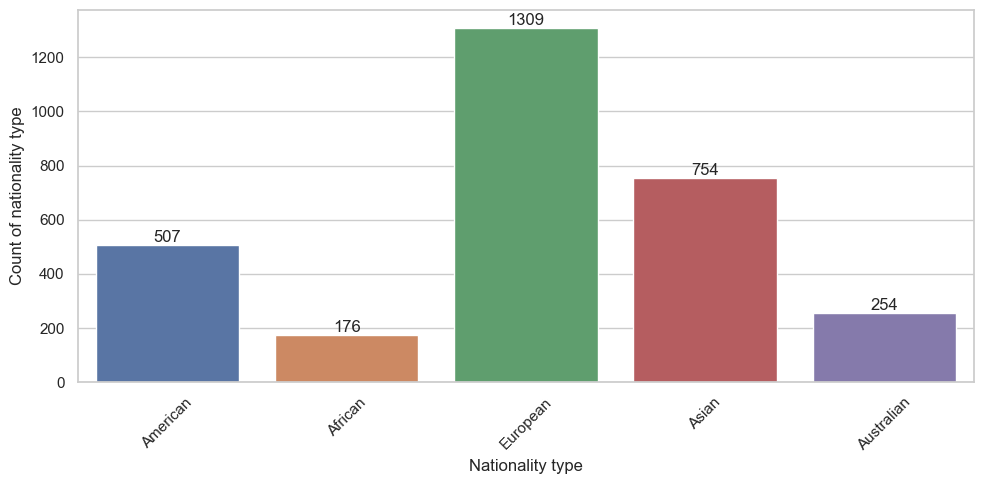

Nationality
European      43.63%
Asian         25.13%
American      16.90%
Australian     8.47%
African        5.87%
Name: proportion, dtype: object


In [31]:
ax = sns.countplot(data=df, x='Nationality', hue='Nationality')
for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel("Nationality type", fontsize=12)
plt.ylabel("Count of nationality type", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
    
Nationality_rate = df['Nationality'].value_counts(normalize=True) * 100
Nationality_rate = Nationality_rate.apply(format_percent)
print(Nationality_rate)

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
    <h2><em>Distribution Plot for numerical columns</em></h2>
</div>

In [32]:
numerical_cols

['Age',
 'Estimated Income',
 'Superannuation Savings',
 'Amount of Credit Cards',
 'Credit Card Balance',
 'Bank Loans',
 'Bank Deposits',
 'Saving Accounts',
 'Foreign Currency Account',
 'Business Lending',
 'Properties Owned',
 'Risk Weighting',
 'Join Year',
 'Bank Tenure (Years)']

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h3><em>Distribution of Age</em></h3>
</div>

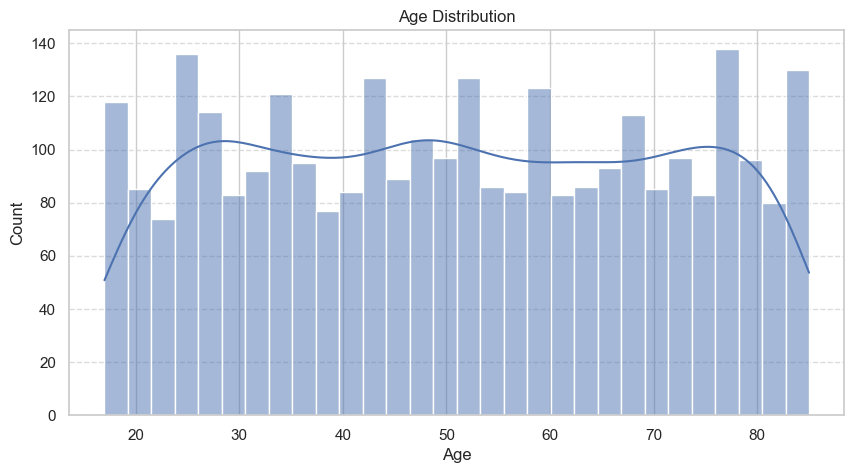

In [33]:
 plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

## 👤 Age: Fairly Even Distribution with Peaks at 30 and 45

### Distribution Overview

The `Age` variable shows a **fairly even distribution** across the adult age range, with **notable peaks near ages 30 and 45**.

> This suggests that a large portion of the bank's customer base falls into **young adult** and **mid-career** age groups.

---

### Key Observations

- **Even Spread**: Customers are spread across a wide range of ages.
- **Peak at ~30**: Likely includes early-career professionals or individuals entering financial independence.
- **Peak at ~45**: May represent mid-career individuals with established income and more complex financial needs (loans, investments).
- **Lower Count <25 or >60**: Indicates fewer very young or retired individuals in the dataset.

---

### Summary

- `Age` is **fairly evenly distributed** with **two significant peaks at ages 30 and 45**.
- These patterns align with **financially active life stages** and can guide product development, risk modeling, and marketing efforts.

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h3><em>Distribution of Estimated Income</em></h3>
</div>

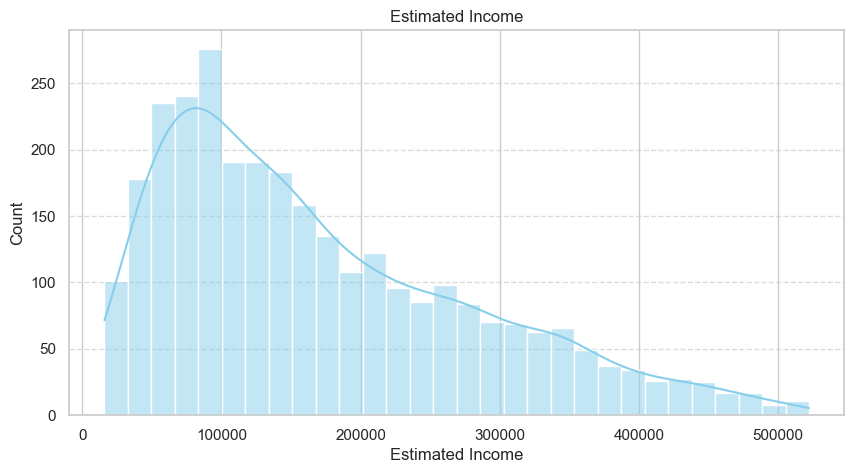

In [34]:
plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(df['Estimated Income'], bins=30, kde=True, color='skyblue')
plt.title("Estimated Income")
plt.show()

    Estimated Income: Right-skewed with most people earning under ₹2.5 Lakh.
## Estimated Income: Right-Skewed Distribution

### What is Observed?

The `Estimated Income` variable in the dataset follows a **right-skewed distribution**, which means:
- A **large portion of individuals earn under ₹2.5 Lakh**,
- While a **smaller group earns significantly more**, pulling the distribution's tail to the right.

> This is common in income data, where high-income earners are fewer but have disproportionately higher values.

---

### Statistical Characteristics

- **Skewness**: Positive (right skew)
- **Concentration**: Majority of values lie between ₹0 – ₹2.5 Lakh
- **Tail**: A long right tail indicates **high-income outliers** (possibly executives, business owners, or investors)

---

### Interpretation & Real-World Insight

| Aspect | Insight |
|--------|---------|
| **Income Inequality** | Reflects real-world economic inequality — most people earn modestly, while a few earn much more. |
| **Targeting Strategy** | Useful for marketing and financial product segmentation (e.g., premium vs. basic credit cards). |
| **Financial Inclusion** | A large number of low-income users may require different product strategies or risk assessments. |

---


### Possible Feature Engineering

- `Income Bracket` (e.g., Low / Medium / High)
- `Income-to-Loan Ratio`
- `Normalized Income` (after log transform)
- `Relative Income Rank` (e.g., percentile rank)

---

### Summary

- `Estimated Income` is **right-skewed**, with most users earning less than ₹2.5 Lakh.
- High-income outliers exist and require **transformation or segmentation** before modeling.
- Proper handling of this feature is critical for **fair and effective predictive analysis**.



<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h2><em>Distribution of Credit Card Balance</em></h2>
</div>

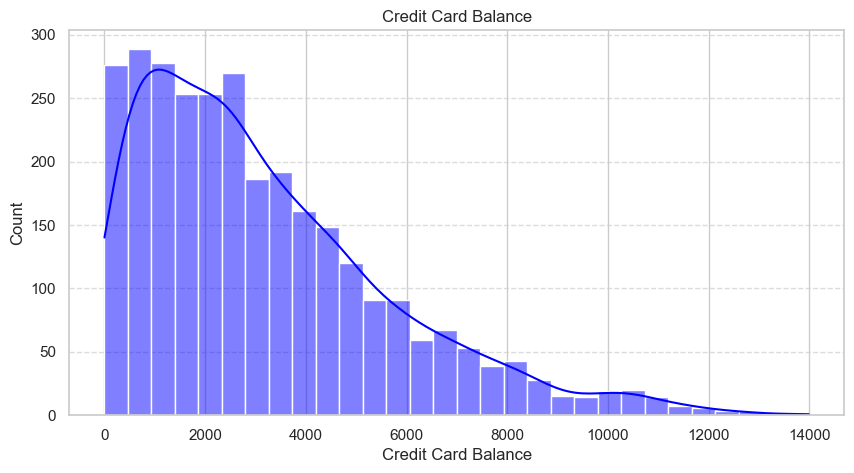

In [35]:
plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(df['Credit Card Balance'], bins=30, kde=True, color='blue')
plt.title("Credit Card Balance")
plt.show()

### Credit Card Balance: Right-Skewed Distribution

### *What is a Right-Skewed Distribution?*

A **right-skewed (positively skewed)** distribution is one where:
- Most data points cluster on the **left (lower values)**,
- And the **tail extends to the right**, representing a few extremely high values.

In this context:
> **Most customers have low-to-moderate credit card balances, while a few carry very high balances.**

---

### Observations in the Dataset

- The distribution of `Credit Card Balance` is **heavily concentrated at lower values**.
- A small group of customers have **exceptionally high balances**, possibly due to high spending behavior, lack of repayments, or premium cardholders.
- This results in a **long right tail**.
  
---

### Interpretation Insights

- Right skewness in credit card balances is common in **consumer finance** — spending habits and financial discipline vary widely.
- May indicate the presence of **risky customers** or **high-value clients**.
- Enables **segmentation** into low spenders vs high spenders for marketing, credit risk analysis, etc.

---

### Recommended Actions

- **Log-transform** `Credit Card Balance` to reduce skewness for modeling.
- **Detect and handle outliers** (e.g., top 1%) for robust statistical inference.
- Create derived metrics:
  - `Balance-to-Income Ratio`
  - `Average Monthly Credit Usage`

---

### Summary

- `Credit Card Balance` exhibits a **right-skewed distribution**.
- This is typical in financial datasets and requires **preprocessing** before use in analytics or machine learning.
- Proper handling enhances **model performance** and ensures **fairer insights** across customer segments.



<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h3><em>Distrubution of Bank Loans & Bank Deposits</em></h3>
</div>

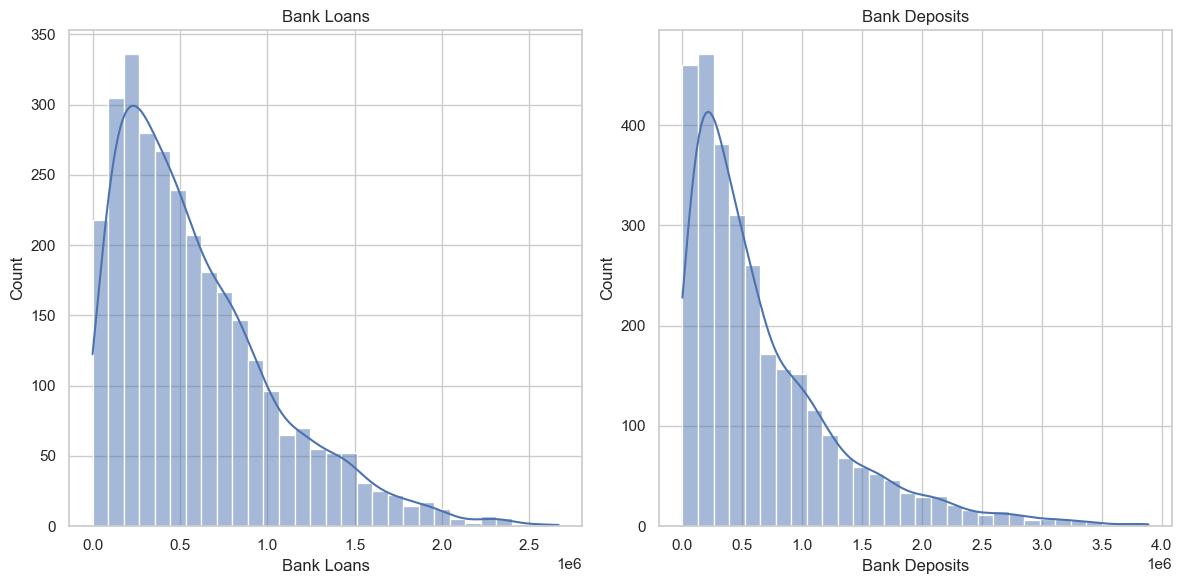

In [36]:
categorical_col= ["Bank Loans", "Bank Deposits"]
plt.figure(figsize=(12, 6))

for i, col in enumerate(categorical_col):
    plt.subplot(1, 2, i + 1)  # 1 row, 2 columns
    sns.histplot(data=df[col], bins=30, kde=True)
    plt.title(col) 

plt.tight_layout()
plt.show()

### Bank Loans and Deposits: Heavy-Tailed Distributions

### What is a Heavy-Tailed Distribution?

A **heavy-tailed distribution** is a probability distribution where:
- A **large number of observations are concentrated near the lower end** (e.g., small values), and
- A **small number of observations extend far into the higher range**, producing a "tail" that decays slowly.

In simple terms:
> **Most people have small to moderate values, but a few have extremely large amounts.**

---

### Observations in the Dataset

#### **Bank Loans**
- Majority of customers have **low to moderate loan amounts**.
- A small group has **very high loans**, possibly business or premium customers.
- Distribution is **right-skewed** (long tail on the right side).

#### **Bank Deposits**
- Most customers maintain **low deposit balances**.
- A few customers have **very large deposits**, pulling the tail of the distribution to the right.
- Also **right-skewed**, showing typical wealth inequality patterns.

---

### Summary

- Both **Bank Loans** and **Bank Deposits** follow a **heavy-tailed, right-skewed distribution**.
- This is typical in financial data where **a few high-value customers account for a disproportionate share of total value**.
- Careful preprocessing is needed before statistical analysis or modeling.

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h3><em>Distrubution of Checking Accounts</em></h3>
</div>
The <em><strong>Checking Accounts</strong></em> column in your dataset likely refers to the balances customers hold in their checking (or current) bank accounts.

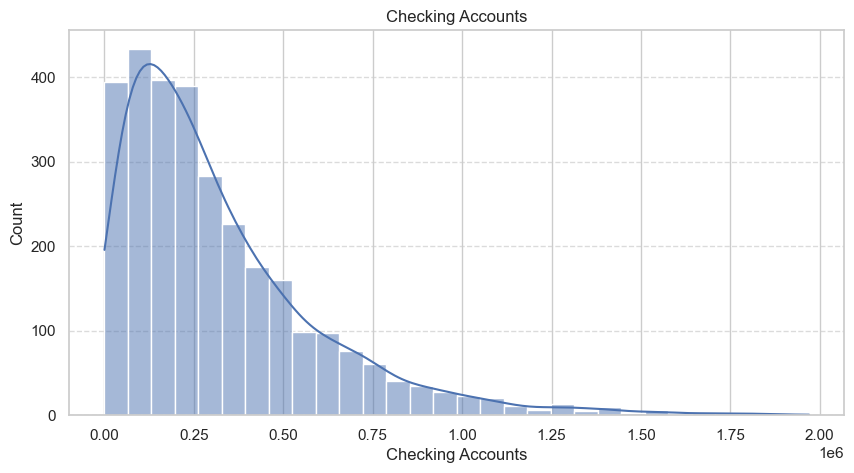

In [37]:
plt.grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(df['Checking Accounts'], bins=30, kde=True)
plt.title("Checking Accounts")
plt.show()

### Distribution Overview

The `Checking Accounts` variable displays a **right-skewed (positively skewed)** distribution, meaning:
- **Most customers have low checking account balances**,
- While a **few customers maintain significantly higher balances**.

> This distribution is typical in banking, where only a minority of clients hold large amounts in checking accounts.

---

### Interpretation & Business Insights

| Insight | Implication |
|--------|-------------|
| **Low Liquidity Users** | Most users keep **small operational balances**, possibly using the account primarily for transactions. |
| **High Liquidity Customers** | A minority maintain high balances, possibly for business use, savings, or as HNWIs (High Net-Worth Individuals). |
| **Segmentation Opportunity** | Identifies premium customers who may be offered **tailored banking products** or investment services. |

---

### Summary

- `Checking Accounts` is **right-skewed**, with most customers holding small balances and a few holding significantly higher ones.
- This skewness is **financially meaningful** and should be carefully handled in **EDA, modeling, and customer profiling**.

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h3><em>Distrubution of Foreign Currency Account</em></h3>
</div>

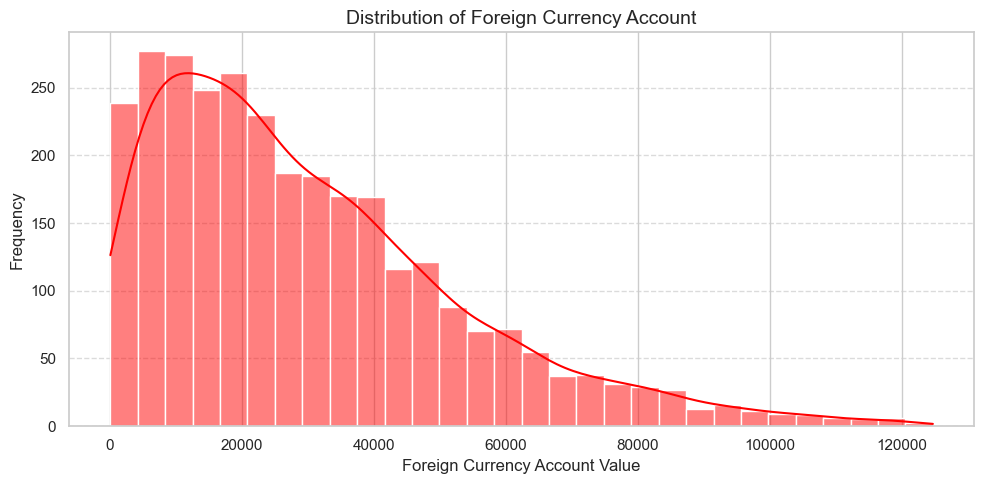

In [38]:
sns.histplot(df['Foreign Currency Account'], bins=30, kde=True, color='red')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Distribution of Foreign Currency Account", fontsize=14)
plt.xlabel("Foreign Currency Account Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

### Distribution Overview

The `Foreign Currency Account` variable shows a **right-skewed distribution**:
- Most customers hold **lower balances** in their foreign currency accounts.
- The frequency **declines sharply after ₹20,000**, with very few customers holding higher amounts.

> This pattern is typical in banking, where only a subset of customers deal actively in foreign currencies — often those involved in international business or travel.

---

### Key Observations

- **Right-Skewed**: Majority of account values are concentrated below ₹20,000.
- **Long Tail**: A few customers maintain much larger balances (potential outliers or premium clients).
- **KDE Curve**: Density decreases steadily after ₹20,000, confirming the skew.

---

### Business Interpretation

| Insight | Implication |
|--------|-------------|
| **Low Usage Among Most Customers** | Indicates foreign currency accounts are not commonly used across the customer base. |
| **Premium Customer Indicator** | High balances could indicate international businesses, frequent travelers, or NRIs. |
| **Product Targeting** | Useful for targeting forex services, investment products, or international banking solutions. |

---

### Summary

- `Foreign Currency Account` is **right-skewed**, with most customers holding **modest balances under ₹20,000**.
- The skew provides insight into **customer behavior and international banking engagement**.
- Should be carefully **transformed or engineered** before use in modeling pipelines.

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h3><em>Distrubution of Risk Weighting</em></h3>
</div>

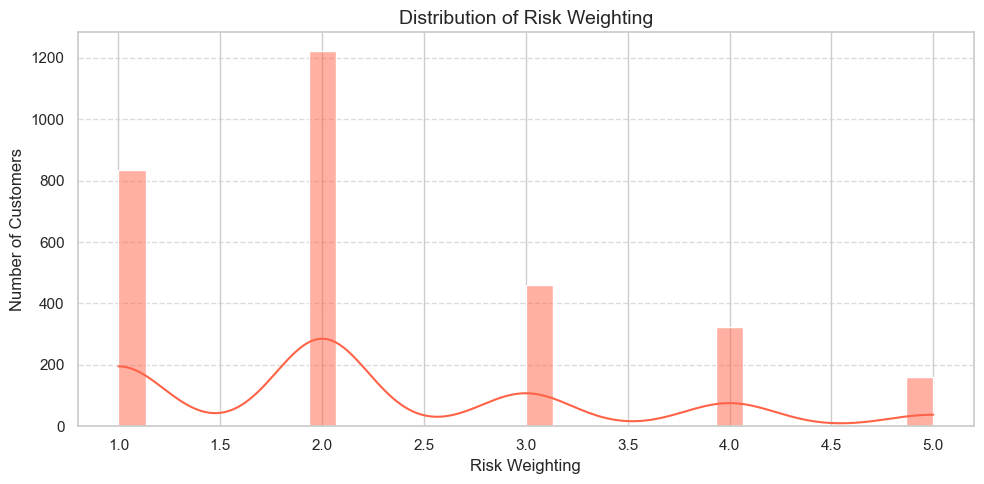

In [39]:
sns.histplot(df['Risk Weighting'], bins=30, kde=True, color='tomato')

plt.title("Distribution of Risk Weighting", fontsize=14)
plt.xlabel("Risk Weighting", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Distribution of Risk Weighting

This histogram visualizes the distribution of the **Risk Weighting** variable, which is assumed to reflect a customer's **credit or lending risk score** (higher values indicate greater risk).

#### Observations:

- The distribution is **right-skewed**, with the majority of customers having **lower risk weighting values**.
- A **long tail** on the right indicates a **small group of high-risk customers**.
- The **peak** is near the lower end, showing that most customers are categorized as **low-risk** based on this metric.
- The presence of a KDE (Kernel Density Estimate) line further confirms the **concentration of customers around the lower risk values**.

#### Interpretation:

- The bank appears to have a **conservative customer base** — most clients fall under **low to moderate risk categories**.
- The **small population of high-risk customers** might warrant closer monitoring, more stringent approval criteria, or adjusted loan terms.
- Useful for **credit risk modeling**: this variable can be used as a **target** or as a **feature** in risk prediction models.

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h3><em>Risk Weighting vs Bank Loans</em></h3>
</div>

    Risk Weighting is a score that helps banks quantify the risk of lending money to a customer or investing in an asset. The higher the score, the riskier the entity.

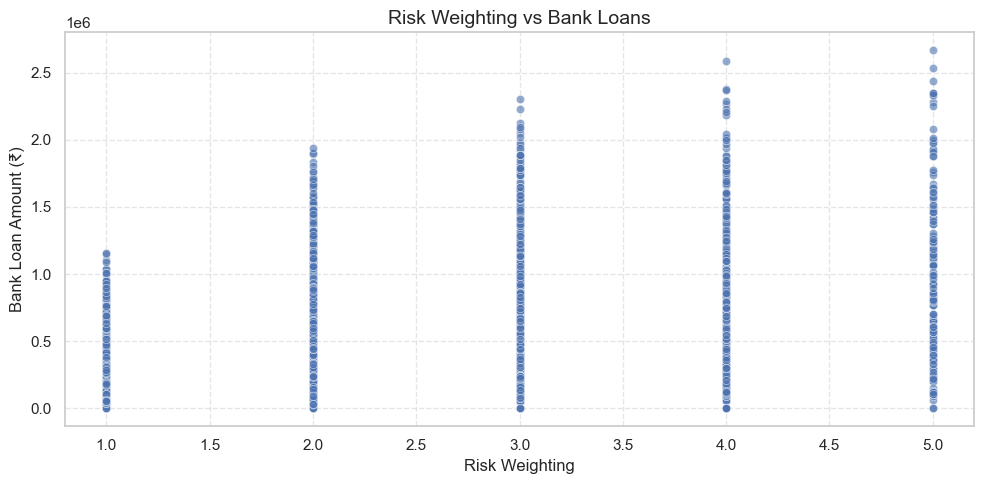

In [40]:
sns.scatterplot(data=df, x='Risk Weighting', y='Bank Loans', alpha=0.6)

plt.title("Risk Weighting vs Bank Loans", fontsize=14)
plt.xlabel("Risk Weighting", fontsize=12)
plt.ylabel("Bank Loan Amount (₹)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Risk Weighting vs Bank Loans

This scatter plot illustrates the relationship between a customer's **Risk Weighting** and their **Bank Loan Amount**.

### Observations

- There's **no strong linear relationship** between **Risk Weighting** and **Loan Amount**.
- Some customers with **high risk weighting** still received **large loans**, possibly due to:
  - High income  
  - Long tenure with the bank  
  - Existing strong customer-bank relationships
- Most **large loan approvals** are clustered around **low to moderate risk scores**, which aligns with expected banking behavior.

---

### Conclusion

- In **real-world banking**, **risk weighting is a key factor** in deciding loan approvals — typically, a **higher risk score results in smaller or no loans**.
- However, in this dataset, the **relationship appears weak <em>( Some high-risk individuals still receive large loans )</em>**, which may be due to:
  - Other influencing variables such as **income**, **property ownership**, or **deposits**
  - The bank’s **historical lending strategy**
  - **Exceptional approvals** or **data quality issues** in the records

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h3><em>Credit Card Balance vs Bank Loans</em></h3>
</div>

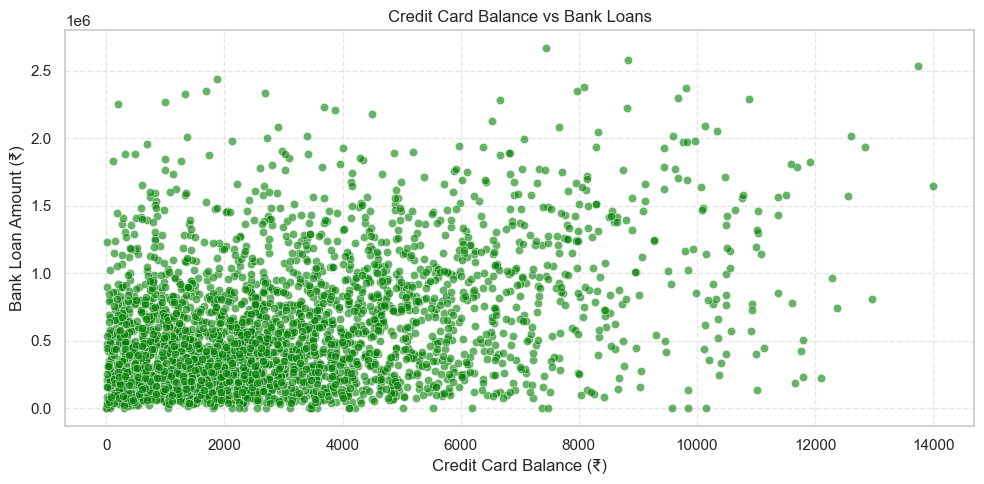

In [41]:
sns.scatterplot(data=df, x='Credit Card Balance', y='Bank Loans', alpha=0.6, color='green')

plt.title("Credit Card Balance vs Bank Loans")
plt.xlabel("Credit Card Balance (₹)")
plt.ylabel("Bank Loan Amount (₹)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Credit Card Balance vs Bank Loans

This scatter plot explores the relationship between a customer's **credit card balance** and their **bank loan amount**.

#### Observations:

- The plot shows a **wide spread** of points with **no strong linear correlation** between the two variables.
- Some customers with **very high credit card balances** have **low or no bank loans**, and vice versa.
- The plot suggests that **credit card usage behavior is not a strong predictor** of loan amounts in this dataset.
- There are clusters of customers with:
  - Low credit card balances and low loans (likely low-engagement users).
  - Low credit card balances but high bank loans (possible installment loan users who avoid credit cards).
  - Few customers with both high credit card balances and high loan values — these may represent **higher-risk profiles**.

#### Interpretation:

- Since credit card balance and loan amount are **not tightly correlated**, they may represent **independent dimensions of credit usage**.
- This reinforces the need to **analyze multiple risk-related variables together** when assessing creditworthiness.

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; text-align: center;">
    <h2><strong><em>Risk Dimension</em></strong></h2>
</div>

## 1. Loan Distribution by Income Band
Shows concentration of loans in certain income groups.  

**Risk:** If too many loans are concentrated in low-income customers, default probability might be higher.  

---

## 2. Loan Distribution by Nationality
Reveals geographic or demographic loan exposure.  

**Risk:** Overexposure to a single group can lead to high losses if that segment faces economic trouble.  

---

## 3. Risk Weighting
Even though the correlation was low with financial metrics, it highlights that non-financial factors (demographics, behavior) affect risk.  

**Risk:** Ignoring these factors may lead to underestimating potential losses.  

---

## 4. Credit Card Utilization Gaps
Many issued cards aren’t being used actively.  

**Risk:** Lower profitability and potential misuse or fraud exposure.  


<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h3><em>Loan Distribution by income band</em></h3>
</div>

In [42]:
def format_percent(x):
    return f"{x:.2f}%"

In [43]:
# Define income bands
bins = [0, 50000, 100000, 200000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
df['Income_Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)

loan_by_income = df.groupby('Income_Band')['Bank Loans'].sum()
loan_by_income_pct = (loan_by_income / loan_by_income.sum() * 100).apply(format_percent)

print("Loan % by Income Band:\n", loan_by_income_pct)

Loan % by Income Band:
 Income_Band
Low           5.81%
Medium       19.45%
High         31.28%
Very High    43.46%
Name: Bank Loans, dtype: object


**Insights:**
- **Very High income** group holds the largest share of loans (**43.46%**), suggesting significant borrowing capacity and possibly higher-value loans.
- **High income** band accounts for **31.28%**, indicating that the majority of loans are concentrated in the top two income groups.
- **Medium income** group contributes **19.45%** of loans.
- **Low income** group has the smallest share (**5.81%**), which could reflect limited borrowing eligibility or smaller loan sizes.

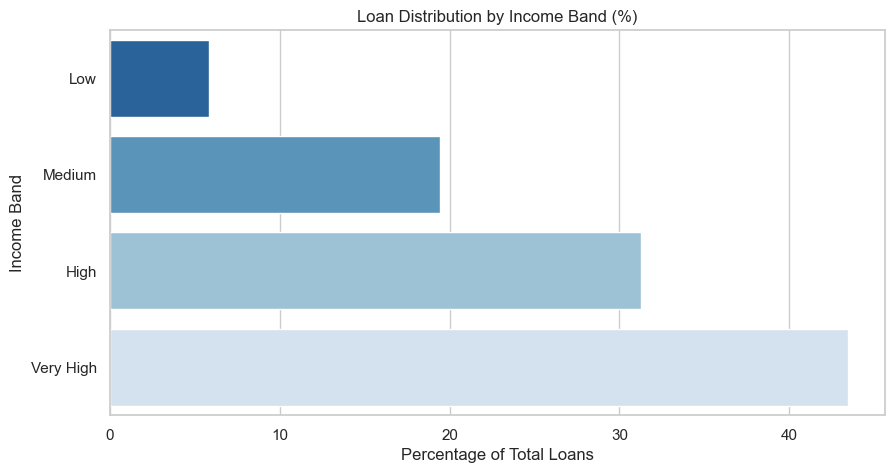

In [44]:
loan_by_income = df.groupby('Income_Band')['Bank Loans'].sum()
loan_by_income_pct = (loan_by_income / loan_by_income.sum() * 100).sort_values()

sns.barplot(x=loan_by_income_pct.values, y=loan_by_income_pct.index, palette="Blues_r")
plt.title("Loan Distribution by Income Band (%)")
plt.xlabel("Percentage of Total Loans")
plt.ylabel("Income Band")
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h3><em>Loan Distribution by Nationality</em></h3>
</div>

In [45]:
loan_by_nat = df.groupby('Nationality')['Bank Loans'].sum()
loan_by_nat_pct = (loan_by_nat / loan_by_nat.sum() * 100).apply(format_percent)

print("\nLoan % by Nationality:\n", loan_by_nat_pct)


Loan % by Nationality:
 Nationality
African        5.65%
American      17.25%
Asian         24.59%
Australian     8.69%
European      43.83%
Name: Bank Loans, dtype: object


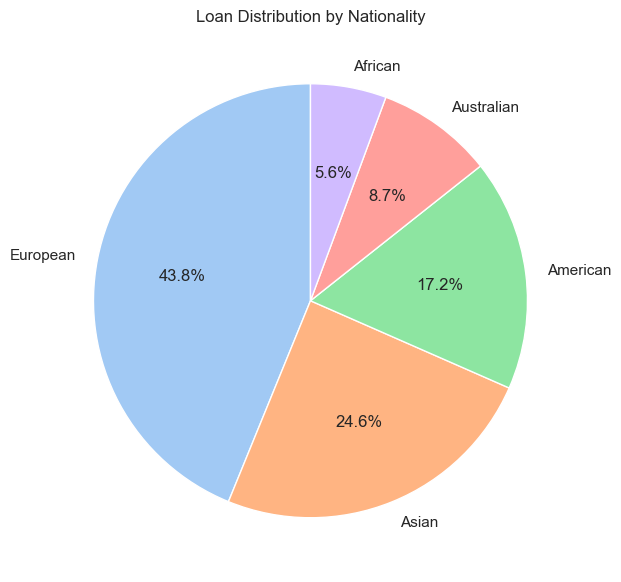

In [46]:
loan_by_nat = df.groupby('Nationality')['Bank Loans'].sum()
loan_by_nat_pct = (loan_by_nat / loan_by_nat.sum() * 100).sort_values(ascending=False)


plt.figure(figsize=(7, 8))
loan_by_nat_pct.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Loan Distribution by Nationality")
plt.ylabel("")
plt.show()

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h3><em>Risk-Weighted Exposure</em></h3>
</div>

In [47]:
df['Risk_Weighted_Exposure'] = df['Bank Loans'] * (df['Risk Weighting'] / 100)
risk_weighted_by_cat = df.groupby(['Nationality', 'Occupation', 'Loyalty Classification'])['Risk_Weighted_Exposure'].sum()

print("\nRisk Weighted Exposure by Category:\n", risk_weighted_by_cat)


Risk Weighted Exposure by Category:
 Nationality  Occupation                  Loyalty Classification
African      Account Executive           Jade                        8335.5124
             Account Representative I    Gold                       11449.6022
                                         Jade                        3062.1424
             Account Representative II   Silver                     49068.8052
             Account Representative III  Silver                      2200.0052
                                                                      ...     
European     Web Developer III           Silver                     67977.6120
             Web Developer IV            Gold                       29767.0200
                                         Jade                       16766.7115
                                         Platinum                    6205.9830
                                         Silver                    143670.0740
Name: Risk_Weighted_Exposure,

### Risk Weighted Exposure by Category

| Nationality | Occupation                  | Loyalty Classification | Risk Weighted Exposure |
|-------------|-----------------------------|------------------------|------------------------|
| African     | Account Executive           | Jade                   | 8,335.51               |
| African     | Account Representative I    | Gold                   | 11,449.60              |
| African     | Account Representative I    | Jade                   | 3,062.14               |
| African     | Account Representative II   | Silver                 | 49,068.81              |
| African     | Account Representative III  | Silver                 | 2,200.01               |
| ...         | ...                          | ...                    | ...                    |
| European    | Web Developer III           | Silver                 | 67,977.61              |
| European    | Web Developer IV            | Gold                   | 29,767.02              |
| European    | Web Developer IV            | Jade                   | 16,766.71              |
| European    | Web Developer IV            | Platinum               | 6,205.98               |
| European    | Web Developer IV            | Silver                 | 143,670.07             |

**Insights:**
- **High Exposure Roles:** Certain technical and senior positions like *Web Developer IV* (Silver classification) have particularly high exposure values.
- **Loyalty Classification Impact:** Silver classification appears frequently with large exposures, suggesting this segment represents significant portfolio risk.
- **Geographic Variation:** European roles, especially in tech, show some of the highest exposures compared to African roles in the sample.
- **Risk Concentration:** A small number of occupation–loyalty combinations hold a large share of total exposure, which could warrant closer monitoring.


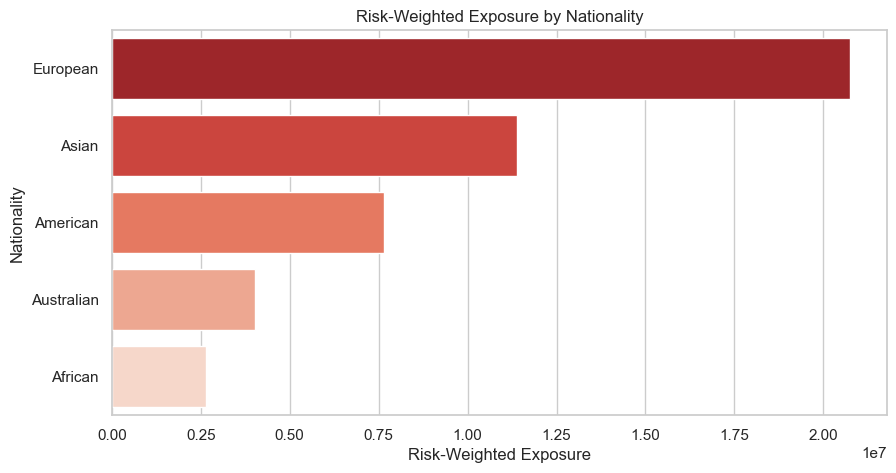

In [48]:
df['Risk_Weighted_Exposure'] = df['Bank Loans'] * (df['Risk Weighting'] / 100)
risk_by_nat = df.groupby('Nationality')['Risk_Weighted_Exposure'].sum().sort_values(ascending=False)

sns.barplot(x=risk_by_nat.head(10).values, y=risk_by_nat.head(10).index, palette="Reds_r")
plt.title("Risk-Weighted Exposure by Nationality")
plt.xlabel("Risk-Weighted Exposure")
plt.ylabel("Nationality")
plt.show()

### Why Non-Financial Factors Affect Risk Weighting

Money alone doesn’t tell the whole story about risk.  
Two people with the same income and savings can have very different risk levels because of **non-financial factors** such as:

- **Demographics** — Age, nationality, or location may affect job stability or economic opportunities.
- **Occupation** — Some jobs are more stable than others; for example, government employees often have steadier income than seasonal workers.
- **Behavior patterns** — Payment history, spending habits, or loyalty to the bank can show reliability (or the lack of it).

These factors can influence the likelihood of someone defaulting on a loan, even if their financial numbers look good on paper.

**In short:** Financial metrics tell you *"how much they have"*, but non-financial factors tell you *"how likely they are to pay you back"*.


<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px;">
<h3><em>Credit Card Utilization Gaps</em></h3>
</div>

In [49]:
# If credit limit column exists:
if 'Credit_Limit' in df.columns:
    df['Utilization_Rate'] = (df['Credit Card Balance'] / df['Credit_Limit']) * 100
    utilization_gap = 100 - df['Utilization_Rate']
else:
    df['Avg_Balance_per_Card'] = df['Credit Card Balance'] / df['Amount of Credit Cards']


if 'Credit_Limit' in df.columns:
    print("\nCredit Card Utilization Gap:\n", utilization_gap.describe())
else:
    print("\nAverage Balance per Card:\n", df['Avg_Balance_per_Card'].describe())


Average Balance per Card:
 count     3000.000000
mean      2559.891708
std       2281.905475
min          1.170000
25%        854.877500
50%       1916.901667
75%       3592.447500
max      13749.830000
Name: Avg_Balance_per_Card, dtype: float64


In [50]:
df.columns

Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId', 'Join Year',
       'Bank Tenure (Years)', 'Income_Band', 'Risk_Weighted_Exposure',
       'Avg_Balance_per_Card'],
      dtype='object')

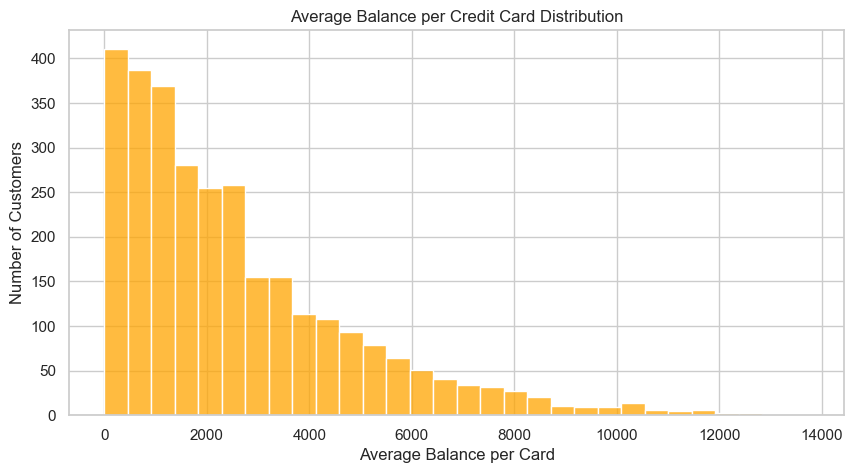

In [51]:
if 'Credit_Limit' in df.columns:
    df['Utilization_Rate'] = (df['Credit Card Balance'] / df['Credit_Limit']) * 100
    df['Utilization_Gap'] = 100 - df['Utilization_Rate']

    sns.histplot(df['Utilization_Gap'], bins=20, color="orange")
    plt.title("Credit Card Utilization Gap Distribution")
    plt.xlabel("Utilization Gap (%)")
    plt.ylabel("Number of Customers")
    plt.show()

else:
    df['Avg_Balance_per_Card'] = df['Credit Card Balance'] / df['Amount of Credit Cards']
    sns.histplot(df['Avg_Balance_per_Card'], bins=30, color="orange")
    plt.title("Average Balance per Credit Card Distribution")
    plt.xlabel("Average Balance per Card")
    plt.ylabel("Number of Customers")
    plt.show()

### Credit Card Utilization Analysis and Balance Analysis

The analysis examines customers’ credit card usage based on the availability of the `Credit_Limit` column.

#### 1. **When `Credit_Limit` is available**
- **Utilization Rate** = (`Credit Card Balance` / `Credit_Limit`) × 100  
  Represents how much of their credit limit customers are using.
- **Utilization Gap** = 100 − `Utilization Rate`  
  Indicates the remaining percentage of credit limit available for use.
- A histogram is plotted to show the **distribution of Utilization Gaps** across all customers.
- **Purpose:** Identify customers with low available credit (small gap) vs. customers with high available credit (large gap).

#### 2. **When `Credit_Limit` is not available**
- **Average Balance per Card** = `Credit Card Balance` / `Amount of Credit Cards`  
  Shows the mean outstanding balance per card.
- A histogram is plotted to show the **distribution of average balances per card**.
- **Purpose:** To understand spending levels per card across customers, which can help identify high-usage or low-usage cardholders

#### **Insights that can be drawn:**
- Customers with **low utilization gaps** may be close to maxing out their credit, indicating potential financial stress or risk.
- Customers with **high average balances per card** (when credit limits are unknown) may also carry higher default risk.
- The visualization helps in **risk assessment**, **customer segmentation**, and identifying **credit limit adjustment opportunities**.
  
## **Insights and Usage**
- **Utilization Gap** analysis helps assess **credit risk**:  
  - Lower gaps → Higher utilization → Potentially higher risk if repayment capacity is low.  
  - Higher gaps → Lower utilization → Indicates available credit capacity.
- **Average Balance per Card** analysis helps in **customer segmentation** and **marketing strategies**:
  - High average balances might indicate premium customers.
  - Low balances may indicate under-utilization or dormant accounts.


<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; text-align: center;">
    <h2><strong><em>Confidence Interval</em></strong></h2>
</div>

In [52]:
import scipy.stats as st

data = df['Bank Loans'].dropna()

# Calculate statistics
mean_val = np.mean(data)
std_err = st.sem(data)
confidence = 0.95
ci_low, ci_high = st.t.interval(confidence, len(data)-1, loc=mean_val, scale=std_err)

In [53]:
print(f"Mean: {mean_val:.2f}, CI: ({ci_low:.2f}, {ci_high:.2f})")

Mean: 591386.16, CI: (575006.38, 607765.93)


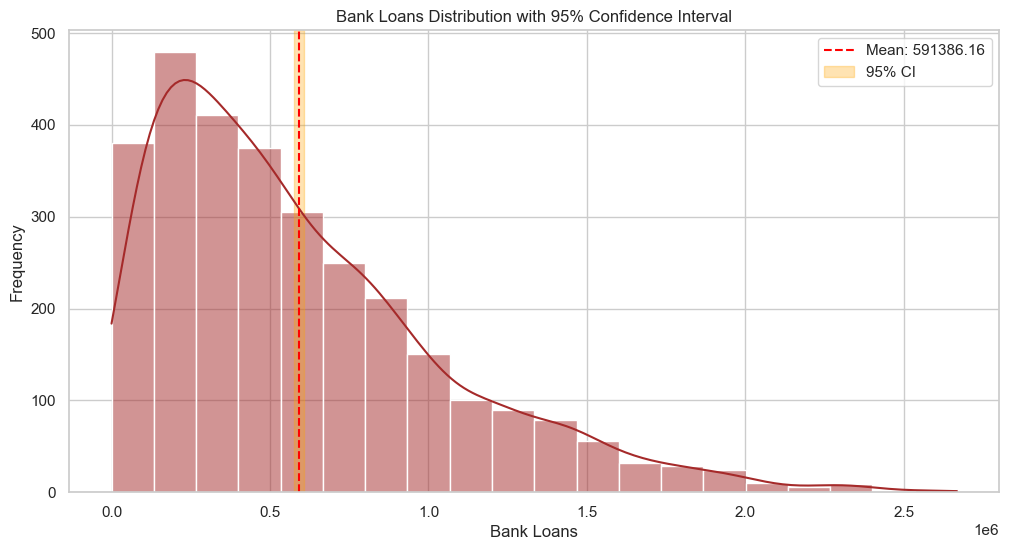

In [54]:
plt.figure(figsize=(12, 6))
sns.histplot(data, kde=True, color='Brown', bins=20)

# Add CI region
plt.axvline(mean_val, color='red', linestyle='--', label=f"Mean: {mean_val:.2f}")
plt.axvspan(ci_low, ci_high, color='orange', alpha=0.3, label=f"{int(confidence*100)}% CI")

plt.title("Bank Loans Distribution with 95% Confidence Interval")
plt.xlabel("Bank Loans")
plt.ylabel("Frequency")
plt.legend()
plt.show()

<center>

## <u>Connected with Me</u>

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; line-height: 2; text-align: center;">
    <a href="mailto:thisside.faisalkhan@example.com">Email Me</a><br>
    <a href="https://www.linkedin.com/in/faisal-khan-332b882bb/">LinkedIn</a><br>
    <a href="https://github.com/Faisal-khann">GitHub</a>
</div>

<br>

<div style="font-family: 'Times New Roman', Times, serif; font-size: 16px; padding: 12px;">
    Made with <span style="color: #e25555;">❤️</span> by <strong>Faisal Khan</strong><br>
    <span style="color: gray; font-size: 13px;">Powered by Jupyter Notebook</span>
</div>

</center>
